In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('applicances  energy prediction data.csv')

In [3]:
df.shape

(19735, 29)

In [4]:
#TELLING THE MISSING DATA POINTS
missing_data = df.isnull().sum()
missing_data

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

In [5]:
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [6]:
df=df.drop(['date','lights'], axis=1)

In [7]:
df.head(2)

,Appliances,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,60,19.89,47.596667,19.2,44.7900,19.79,44.73,19.0,45.566667,17.166667,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,60,19.89,46.693333,19.2,44.7225,19.79,44.79,19.0,45.992500,17.166667,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195


In [8]:
df.describe()

,Appliances,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,19.592106,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,1.844623,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,15.330000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,18.277500,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,19.390000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,20.619643,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,25.795000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


In [9]:
df.corr()

,Appliances,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
Appliances,1.000000,0.055447,0.086031,0.120073,-0.060465,0.085060,0.036292,0.040281,0.016965,0.019760,...,0.010010,-0.051462,0.099155,-0.034885,-0.152282,0.087122,0.000230,0.015353,-0.011145,-0.011145
T1,0.055447,1.000000,0.164006,0.836834,-0.002509,0.892402,-0.028550,0.877001,0.097861,0.885247,...,0.844777,0.071756,0.682846,-0.150574,-0.345481,-0.087654,-0.076210,0.571309,-0.006203,-0.006203
RH_1,0.086031,0.164006,1.000000,0.269839,0.797535,0.253230,0.844677,0.106180,0.880359,0.205797,...,0.115263,0.764001,0.340767,-0.293957,0.274126,0.204932,-0.021057,0.639106,-0.000699,-0.000699
T2,0.120073,0.836834,0.269839,1.000000,-0.165610,0.735245,0.121497,0.762066,0.231563,0.720550,...,0.675535,0.157346,0.792255,-0.133028,-0.505291,0.052495,-0.069721,0.582602,-0.011087,-0.011087
RH_2,-0.060465,-0.002509,0.797535,-0.165610,1.000000,0.137319,0.678326,-0.047304,0.721435,0.110409,...,0.054544,0.676467,0.033674,-0.255646,0.584911,0.069190,-0.005368,0.499152,0.006275,0.006275
T3,0.085060,0.892402,0.253230,0.735245,0.137319,1.000000,-0.011234,0.852778,0.122737,0.888169,...,0.901324,0.134602,0.699417,-0.189974,-0.281718,-0.100776,-0.102310,0.645886,-0.005194,-0.005194
RH_3,0.036292,-0.028550,0.844677,0.121497,0.678326,-0.011234,1.000000,-0.140457,0.898978,-0.050062,...,-0.195270,0.833538,0.118207,-0.233274,0.356192,0.263188,0.017041,0.414387,-0.000477,-0.000477
T4,0.040281,0.877001,0.106180,0.762066,-0.047304,0.852778,-0.140457,1.000000,-0.048650,0.871813,...,0.889439,-0.025549,0.663478,-0.075292,-0.388602,-0.185747,-0.104768,0.519471,-0.001815,-0.001815
RH_4,0.016965,0.097861,0.880359,0.231563,0.721435,0.122737,0.898978,-0.048650,1.000000,0.091812,...,-0.044518,0.856591,0.293289,-0.250748,0.336813,0.300192,0.002636,0.616509,-0.001787,-0.001787
T5,0.019760,0.885247,0.205797,0.720550,0.110409,0.888169,-0.050062,0.871813,0.091812,1.000000,...,0.911055,0.072308,0.651321,-0.170999,-0.273953,-0.145011,-0.084164,0.588362,-0.005490,-0.005490


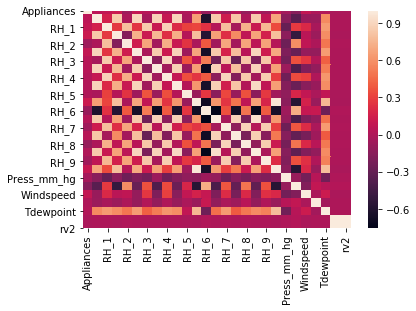

In [10]:
sns.heatmap(df.corr())

In [11]:
corr_matrix=df.corr()

In [12]:
print(corr_matrix['Appliances'])#.sort_values(ascending=false)

Appliances     1.000000
T1             0.055447
RH_1           0.086031
T2             0.120073
RH_2          -0.060465
T3             0.085060
RH_3           0.036292
T4             0.040281
RH_4           0.016965
T5             0.019760
RH_5           0.006955
T6             0.117638
RH_6          -0.083178
T7             0.025801
RH_7          -0.055642
T8             0.039572
RH_8          -0.094039
T9             0.010010
RH_9          -0.051462
T_out          0.099155
Press_mm_hg   -0.034885
RH_out        -0.152282
Windspeed      0.087122
Visibility     0.000230
Tdewpoint      0.015353
rv1           -0.011145
rv2           -0.011145
Name: Appliances, dtype: float64


(0, 1133.5652378032105)

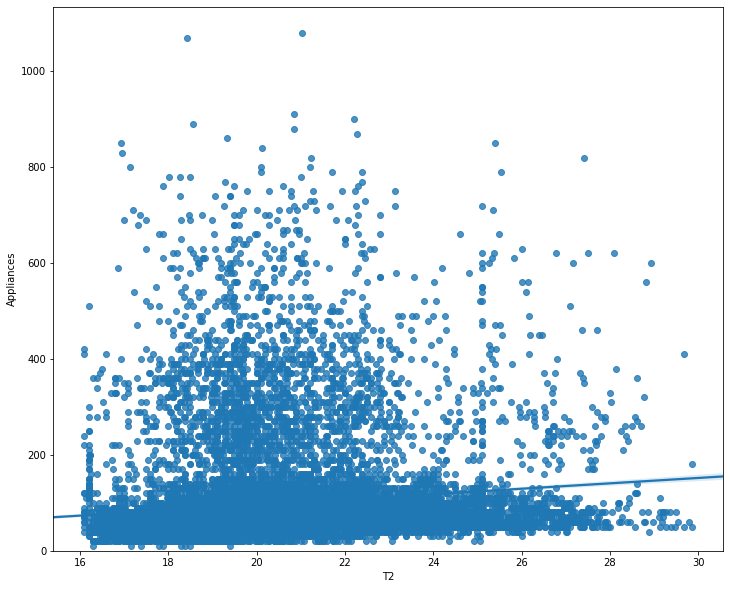

In [13]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="T2", y="Appliances", data=df)
plt.ylim(0,)

(0, 1133.5652378032105)

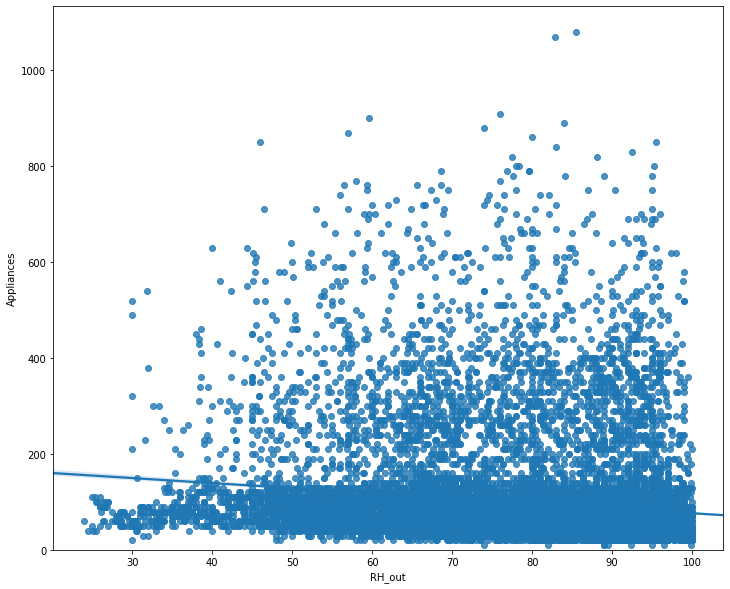

In [14]:
#sns.regplot(x="RH_out", y="Appliances", data=df)
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="RH_out", y="Appliances", data=df)
plt.ylim(0,)

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [39]:
X_data = df[['T2']]
y_data= df['T6']

In [40]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=0)


print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])


number of test samples : 3947
number of training samples: 15788


In [41]:
lm.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [42]:
y_pred=lm.predict(x_test)

In [43]:
y_pred

array([ 6.74582472,  6.02789686,  7.58217368, ..., -0.18921041,
        7.58217368,  8.75898327])

In [22]:
print(lm.intercept_)

179.52676431603368


In [44]:
print(lm.coef_)

[2.22039545]


In [24]:
dayf = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
dayf

,Actual,Predicted
15563,290,136.415631
12564,50,102.235888
10649,260,109.449703
16554,50,147.579869
8130,30,77.502808
...,...,...
7163,60,95.022073
3155,130,85.060138
7869,50,82.655533
15801,300,96.567890


In [25]:
from sklearn import metrics

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

In [47]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 2.8287612797446706
Mean Squared Error: 13.100849590525138
Root Mean Squared Error: 3.6195095787309555


In [26]:
rss= np.sum(np.square(y_test - y_pred))
rss

43872798.79851812

In [46]:
from sklearn.metrics import r2_score
r2_score= r2_score(y_test,y_pred) 
round(r2_score,2)

0.65

applying Polynomial regression to the simple linear regression

In [28]:
from sklearn.preprocessing import PolynomialFeatures

In [29]:
from sklearn.pipeline import make_pipeline

In [30]:
x_train, x_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=0)


print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])


number of test samples : 3947
number of training samples: 15788


In [31]:
model = make_pipeline(PolynomialFeatures(degree= 2), LinearRegression())

In [32]:
model.fit(x_train , y_train)

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [33]:
y_poly = model.predict(x_test)

In [34]:
y_poly

array([124.26715844, 106.85459423, 113.73124732, ...,  79.55457989,
       100.24980237, 108.64726484])

In [35]:
dayf_poly = pd.DataFrame({'Actual': y_test, 'Predicted': y_poly})
dayf_poly

,Actual,Predicted
15563,290,124.267158
12564,50,106.854594
10649,260,113.731247
16554,50,121.622842
8130,30,70.272840
...,...,...
7163,60,98.264962
3155,130,83.586967
7869,50,79.554580
15801,300,100.249802


In [36]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_poly))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_poly))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_poly)))

Mean Absolute Error: 60.26792798653028
Mean Squared Error: 11097.39862566571
Root Mean Squared Error: 105.34419122887465


In [37]:
rss= np.sum(np.square(y_test - y_poly))
rss

43801432.37550256

In [38]:
r2_score2= r2_score(y_test,y_poly) 

TypeError: 'numpy.float64' object is not callable

##doing polynomial to the third degree to see if there is an improvement in the r2_score##

In [ ]:
mode = make_pipeline(PolynomialFeatures(degree= 7), LinearRegression())

In [ ]:
mode.fit(x_train , y_train)

In [ ]:
y_poly3 = model.predict(x_test)

In [ ]:
dayf_poly3 = pd.DataFrame({'Actual': y_test, 'Predicted': y_poly3})
dayf_poly3

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_poly3))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_poly3))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_poly3)))

In [ ]:
rss= np.sum(np.square(y_test - y_poly3))
rss

In [ ]:
print(r2_score(y_test,y_poly3))

MULTIPLR LINEAR REGRESSION

In [48]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [49]:
df.columns

Index(['Appliances', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4',
       'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9',
       'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility',
       'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

In [50]:
X=df[['T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4',
       'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9',
       'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility',
       'Tdewpoint', 'rv1', 'rv2']].values
y=df['Appliances'].values

In [51]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)


In [52]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [53]:
print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples : 3947
number of training samples: 15788


In [54]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [55]:
y_pred = regressor.predict(X_test)

In [56]:
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

In [57]:
df1

,Actual,Predicted
0,40,45.547619
1,90,271.204107
2,50,46.380257
3,50,122.753382
4,70,34.995379
...,...,...
5916,250,102.669436
5917,60,90.424654
5918,50,83.238363
5919,110,117.345882


In [58]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 53.64297765584947
Mean Squared Error: 8768.535925051976
Root Mean Squared Error: 93.6404609399803


In [59]:
rss= np.sum(np.square(y_test - y_pred))
rss

51918501.21223275

In [60]:
from sklearn.metrics import r2_score
r2_score= r2_score(y_test,y_pred) 
round(r2_score,3)

0.149

APPLYING RIDGE REGRESSION ON THE DATA

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [62]:

# import ridge regression from sklearn library 
from sklearn.linear_model import Ridge 
  
# Train the model  
ridgeR = Ridge(alpha = 0.4) 
ridgeR.fit(X_train, y_train) 
y_pred_ridge = ridgeR.predict(X_test) 
  

In [65]:
ridgeR = Ridge(alpha = 0.4) 
ridgeR.fit(X_train, y_train) 
y_pred_ridge = ridgeR.predict(X_train) 

In [67]:
print('Mean Squared Error:', metrics.mean_squared_error(y_train, y_pred_ridge))  

Mean Squared Error: 9066.021891138487


In [63]:
y_pred_ridge

array([ 45.54857692, 271.19847813,  46.38091532, ...,  83.23942456,
       117.34695099,  71.23019955])

In [64]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_ridge))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_ridge))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_ridge)))

Mean Absolute Error: 53.642824942307236
Mean Squared Error: 8768.543986942337
Root Mean Squared Error: 93.64050398701588


In [ ]:
rss= np.sum(np.square(y_test - y_pred_ridge))
rss

In [68]:
# import Lasso regression from sklearn library 
from sklearn.linear_model import Lasso 

In [69]:
# Train the model 
lasso = Lasso(alpha = 1) 
lasso.fit(X_train, y_train) 
y_pred_lasso = lasso.predict(X_test) 

In [70]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_lasso))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_lasso))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_lasso)))

Mean Absolute Error: 53.527814871125926
Mean Squared Error: 8815.801087430416
Root Mean Squared Error: 93.89249750342366


In [ ]:
rss= np.sum(np.square(y_test - y_pred_lasso))
rss

In [ ]:
# import model 
from sklearn.linear_model import ElasticNet 

In [ ]:
# Train the model 
e_net = ElasticNet(alpha = 1) 
e_net.fit(X_train, y_train) 
y_pred_elastic= e_net.predict(X_test)

In [ ]:
y_pred_elastic

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_elastic))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_elastic))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_elastic)))

In [ ]:
rss= np.sum(np.square(y_test - y_pred_elastic))
rss

In [ ]:
from sklearn.model_selection import cross_val_score

APPLYING CROSS VALIDATION

In [ ]:
from sklearn.model_selection import cross_val_score
all_accuracies = cross_val_score(estimator=regressor, X=X_scaled, y=y_train, cv=5)